In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time

In [3]:
from runner import Runner

In [4]:
R = Runner(verbose=False)

*** GP2 ***
Working directory: /tmp/tmp928wsju_GP2


In [5]:
# load our lucchi augmented dataset with flipped and rotated images (2640 images and masks)
images = np.load('/raid/mpsych/augmented_images_flip_rotate.npy')
masks = np.load('/raid/mpsych/augmented_masks_flip_rotate.npy')

In [6]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}
PERCENT_TO_REPLACE = 20
R = Runner(verbose=False)
R.setup_data(images, masks, dataset_size=2640, weights=weights)
RUNS = 10

*** GP2 ***
Working directory: /tmp/tmp928wsju_GP2
Weights OK!


In [7]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    l = R.find_machine_labels()
    if l == 0:
        print('No more machine labels.')
        print('TOOK', time.time()-t0, 'seconds')
        break
    R.relabel(percent_to_replace=PERCENT_TO_REPLACE)
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0
Model saved to /tmp/tmp928wsju_GP2/unet_0.model
History saved to /tmp/tmp928wsju_GP2/history_0.pickle
Testing the classifier...
25/25 [==============================] - 3s 102ms/step - loss: 1.3284 - dice_coeff: 0.1100
Model saved to /tmp/tmp928wsju_GP2/cnnd_0.model
History saved to /tmp/tmp928wsju_GP2/cnnd_history_0.pickle
Testing the discriminator...
5/5 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Found 81 machine labels.
Replacing 16 from 81 !
D_relabeled_ 16
point ids 16
Removed: 16 Filled: 16
TOOK 951.3162896633148 seconds
***
RUN: 1
Model saved to /tmp/tmp928wsju_GP2/unet_1.model
History saved to /tmp/tmp928wsju_GP2/history_1.pickle
Testing the classifier...
25/25 [==============================] - 3s 101ms/step - loss: 1.2646 - dice_coeff: 0.1238
Testing the discriminator...
5/5 [==============================] - 0s 22ms/step - loss: 24.4974 - accuracy: 0.9747
Found 71 machine labels.
Replacing 14 from 71 !
D_relabeled_ 14
poi

In [8]:
R.classifier_scores

[[1.3283661603927612, 0.11003784835338593],
 [1.2646315097808838, 0.12379609793424606],
 [1.209451675415039, 0.1331869661808014],
 [0.9222943186759949, 0.3272845149040222]]

In [9]:
R.discriminator_scores

[[0.0, 1.0],
 [24.497390747070312, 0.9746835231781006],
 [790.1834716796875, 0.6645569801330566],
 [8258.7900390625, 0.4683544337749481]]

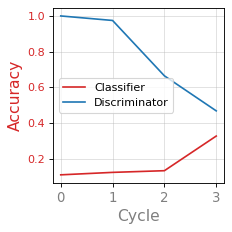

In [10]:
R.plot()